# Campaign for selling personal loans
-------------


## Problem Statement :
-------------

This case is about a bank (Thera Bank) which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget. 


## Objective
---------
The department wants to build a model that will help them identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign. 
 

## Dataset
-------
The csv file provided contains data on 5000 customers. The data includes customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.


## Expectations
------------

1. What are the insights that you can infer from studying the various attributes? Are there any specific points that you would like to bring attention to?<br/>
2. What are the approaches that can be used to model the likelihood of a customer buying personal loans?<br/>
3. Of the approaches tried, which model is the best when it comes to predictive performance in this case? Are their any drawbacks in your chosen approach? How would you adjust for it?<br/>
4. Which are the most important attributes which influence a customer’s decision to go for a loan? What actions can you recommend in order to improve the campaign to sell more loans?<br/>
5. Are their any improvements from a data collection perspective that you would like to suggest?<br/>
6. Submit your technical analysis in a python notebook. Also create a summary report explaining your insights and recommendations in plain and simple words such that nonanalyst can understand it.


## Solution/Approach
------------
#### Steps
1. Reading csv file and then checking dimension,few rows to know little about data etc
2. Variable identification to know about <b>continuous or categorical in nature</b>,checking any missing value,removing ID        column
3. Univariate analysis<br/>
    A. Continuous Variables<br/>
    Tabular and graphical method is used to know about <b>mean,median,mode,Q1,Q3,skewness,outliers</b> etc
    
    B. Categorical Variables<br/>
    Tabular and graphical method is used to know about number of times each value occuring in that particular column<br/>
    <br/>
4. Bivariate analysis<br/>
    Tabular and graphical method is used to know about relation between continuous-continuous variables using            
    <b>correlation</b>,categorical-continuous variables using grouping and categorical-categorical variables using crosstab.
5. Missing Value Treatment<br/>
    This step is not required as there is no missing values.
6. Outliers Treatment:<br/>
    Using <b>box plot</b>, i am able to find outliers then using <b>Q1-1.5(Q3-Q1)</b> and <b>Q3+1.5(Q3-Q1)</b> , i am replacing     that outliers with median.
7. Variable Transformation:<br/>
    Using StandardScaler from scikit learn ,transforming all columns values in such a manner that it will lie in -3 to +3 std
8. Modeling:<br/>
   a.Splitting the dataset into training and testing<br/><br/>
   <b>8.1 Logistic Regression (Accuracy : 93%,F1_score=46%)</b><br/>
   <b>8.2 KNN(Accuracy : 92%,F1_score=53%)</b><br/>
   <b>8.3 Random Forest(Accuracy : 97%,F1_score=85%)</b><br/>
   
   b.Finally compare the <b>accuracy,F1_score</b> of each of the model.<br/>

# 1. Exploring the dataset :

In [2]:
# importing common use libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
# importing the dataset

df=pd.read_csv('Bank_Personal_Loan_Modelling.csv')

df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.40,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.50,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.30,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.60,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.90,3,0,1,0,0,0,0


In [4]:
# copying the original dataset


df_original=df.copy()

In [5]:
# checking dimension

df.shape

(5000, 14)

In [6]:
# seeing columns in dataset

df.columns.tolist()

['ID',
 'Age',
 'Experience',
 'Income',
 'ZIP Code',
 'Family',
 'CCAvg',
 'Education',
 'Mortgage',
 'Personal Loan',
 'Securities Account',
 'CD Account',
 'Online',
 'CreditCard']

In [7]:
# observing values of first 10 rows

df.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


# 2. Variables Identification :

In [8]:
# checking data type and any missing value

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


## Observation:
1. We don't have any missing value in above dataset because 5000 is the number of rows in our dataset.

In [9]:
# checking how many number of times each value is coming in each of the columns

for i in df.columns.tolist():
    print(i)
    print(df[i].value_counts())
    print('*'*51)

ID
2047    1
2608    1
4647    1
2600    1
553     1
4651    1
2604    1
557     1
4655    1
561     1
2596    1
4659    1
2612    1
565     1
4663    1
2616    1
569     1
4667    1
549     1
4643    1
417     1
533     1
2572    1
525     1
4623    1
2576    1
529     1
4627    1
2580    1
4631    1
       ..
3291    1
3295    1
3239    1
1250    1
3299    1
1254    1
3303    1
1258    1
3307    1
1262    1
1230    1
3275    1
1226    1
3271    1
1194    1
3243    1
1198    1
3247    1
1202    1
3251    1
1206    1
3255    1
1210    1
3259    1
1214    1
3263    1
1218    1
3267    1
1222    1
2049    1
Name: ID, Length: 5000, dtype: int64
***************************************************
Age
35    151
43    149
52    145
58    143
54    143
50    138
41    136
30    136
56    135
34    134
39    133
59    132
57    132
51    129
60    127
45    127
46    127
42    126
40    125
31    125
55    125
62    123
29    123
61    122
44    121
32    120
33    120
48    118
38    115
49  

## Observation :

1. Column <b>'ID'</b> is appearing exactly like primary key(as in DBMS),in each row value differs so i will drop this column
2. <b>Experience</b> value contains some <b>negative value</b> like -1,-2 and -3 so i will clean these values
3. Columns Age,Experience,Income,Zip,CCAvg and Mortgage are continuous in nature
4. Family,Education,Personal loan,Securities Account,CD Account,Online and CreditCard are categorical in nature but these all present in numerical form

In [10]:
# dropping column 'ID'

df.drop('ID',axis=1,inplace=True)

In [11]:
# now we have 13 columns instead of 14

df.shape

(5000, 13)

In [12]:
# replacing negative values with median value

df.loc[(df['Experience']<0),'Experience']=df['Experience'].median()

## 3. Univariate Analysis

### 3.1 Continuous Variables

In [13]:
df.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.327600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.253035,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,11.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


## Observation :

1.There is much fluctuation in values of different columns so i will transform these values in transformation section

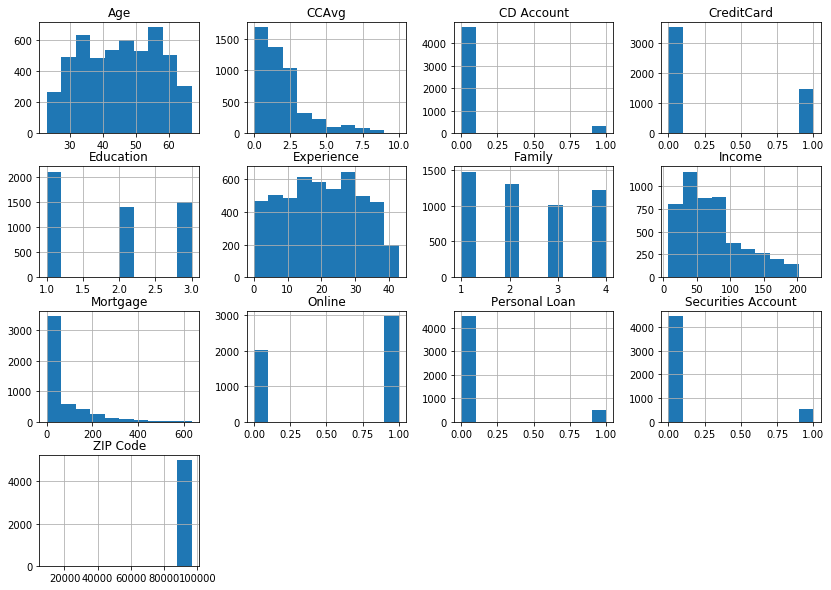

In [14]:
df.hist(figsize=(14,10))
plt.show()

## Observations :

1. Most of the values in <b>Age</b> column lie between 30 and 60
2. These three columns <b>CCAvg,Income and Mortgage</b> values are left skewed.

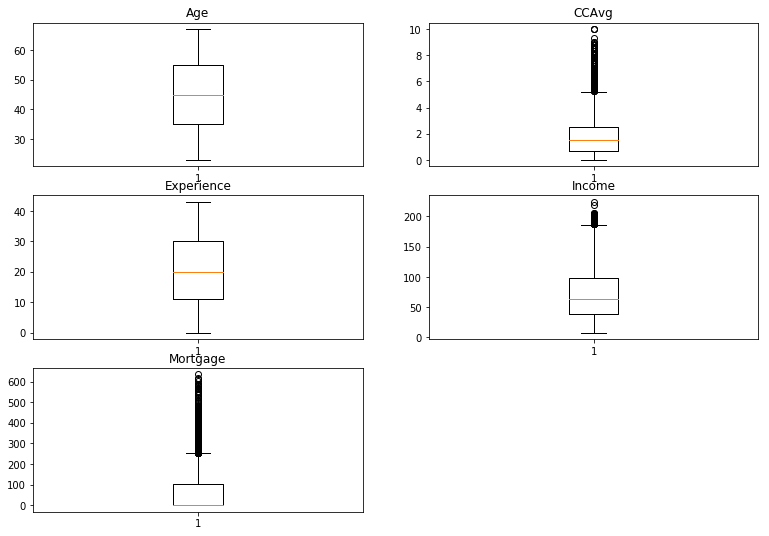

In [15]:
plt.figure(figsize=(13,9))

plt.subplot(321)
plt.boxplot(df['Age'])
plt.title('Age')
plt.subplot(322)
plt.boxplot(df['CCAvg'])
plt.title('CCAvg')
plt.subplot(323)
plt.boxplot(df['Experience'])
plt.title('Experience')
plt.subplot(324)
plt.boxplot(df['Income'])
plt.title('Income')
plt.subplot(325)
plt.boxplot(df['Mortgage'])
plt.title('Mortgage')
plt.show()

# Observations :
1. Out of these five box plot,three of them contains outliers so i will remove it in outlier section

### 3.2 Categorical Variables

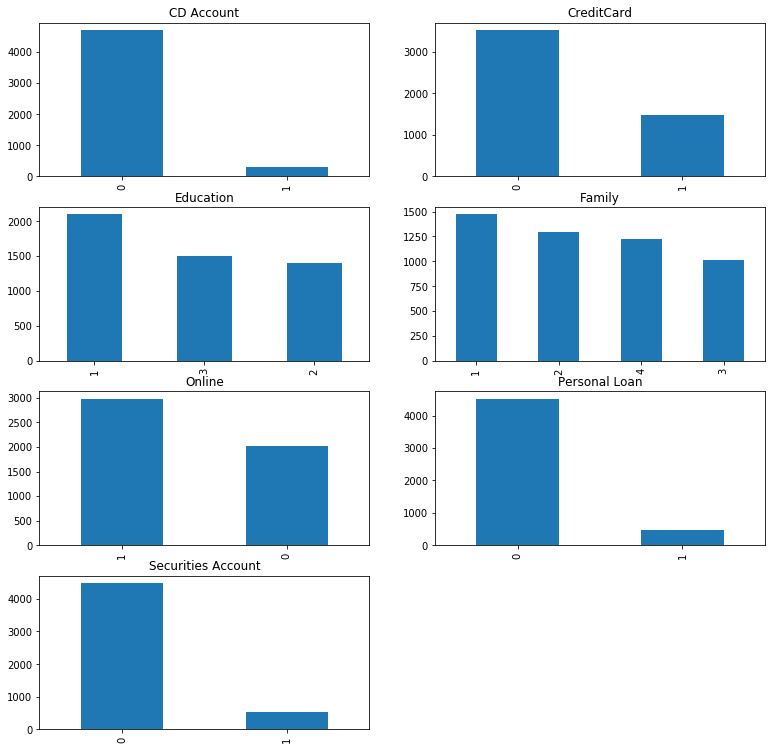

In [16]:
plt.figure(figsize=(13,13))

plt.subplot(421)
df['CD Account'].value_counts().plot.bar()
plt.title('CD Account')
plt.subplot(422)
df['CreditCard'].value_counts().plot.bar()
plt.title('CreditCard')
plt.subplot(423)
df['Education'].value_counts().plot.bar()
plt.title('Education')
plt.subplot(424)
df['Family'].value_counts().plot.bar()
plt.title('Family')
plt.subplot(425)
df['Online'].value_counts().plot.bar()
plt.title('Online')
plt.subplot(426)
df['Personal Loan'].value_counts().plot.bar()
plt.title('Personal Loan')
plt.subplot(427)
df['Securities Account'].value_counts().plot.bar()
plt.title('Securities Account')
plt.show()

## 4. Bivariate Analysis:

### 4.1 Continuous-Continuous Variables

In [17]:
df.corr()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.977182,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.977182,1.000000,-0.049046,-0.028492,-0.045528,-0.048718,0.018074,-0.013365,-0.014013,-0.000465,0.005526,0.013459,0.008834
Income,-0.055269,-0.049046,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,-0.029216,-0.028492,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.046418,-0.045528,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.048718,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.018074,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.013365,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.014013,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.000465,-0.002616,0.004704,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028


# Observations :
1. Age and Experience are highly correlated(0.977182) so i will drop Experience column
2. Personal Loan and Income are also more correlated(0.502462)
3. CCAvg and Income are also more correlated(0.645984)

### 4.2 Categorical-continuous variables:

In [18]:
df.groupby('Personal Loan')['Age'].mean()

Personal Loan
0    45.367257
1    45.066667
Name: Age, dtype: float64

In [19]:
df.groupby('Personal Loan')['Income'].mean()

Personal Loan
0     66.237389
1    144.745833
Name: Income, dtype: float64

In [20]:
df.groupby('Personal Loan')['CCAvg'].mean()

Personal Loan
0    1.729009
1    3.905354
Name: CCAvg, dtype: float64

In [21]:
df.groupby('Personal Loan')['Mortgage'].mean()

Personal Loan
0     51.789381
1    100.845833
Name: Mortgage, dtype: float64

# Observations:
Personal Loan with Income and Mortgage(with value 1) are more affected

### 4.3 Categorical-Categorical Variables

In [22]:
crosstab = pd.crosstab(index=df['Personal Loan'], columns=df['Family'])
crosstab

Family,1,2,3,4
Personal Loan,,,,
0,1365,1190,877,1088
1,107,106,133,134


In [23]:
crosstab = pd.crosstab(index=df['Personal Loan'], columns=df['Education'])
crosstab

Education,1,2,3
Personal Loan,,,
0,2003,1221,1296
1,93,182,205


In [24]:
crosstab = pd.crosstab(index=df['Personal Loan'], columns=df['CreditCard'])
crosstab

CreditCard,0,1
Personal Loan,,
0,3193,1327
1,337,143


# Observations:
In last three cell,we can see directly personal loan with value 0 are playing important role with all other categorical variables.

## 5. Missing Value Treatment :

There is <b>no missing values</b> in dataset so this step is <b>not required</b>

## 6. Outlier Treatment:

i am using formula to remove outliers from top and bottom of box plot<br/>
<b>from top : Q3+1.5*(Q3-Q1)</b><br/>
<b>from bottom : Q1-1.5*(Q3-Q1)</b>

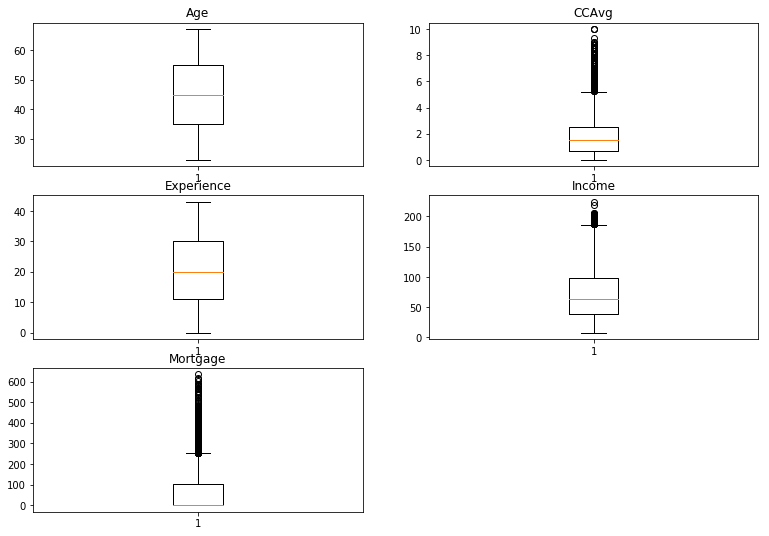

In [25]:
# With OUTLIERS

plt.figure(figsize=(13,9))

plt.subplot(321)
plt.boxplot(df['Age'])
plt.title('Age')
plt.subplot(322)
plt.boxplot(df['CCAvg'])
plt.title('CCAvg')
plt.subplot(323)
plt.boxplot(df['Experience'])
plt.title('Experience')
plt.subplot(324)
plt.boxplot(df['Income'])
plt.title('Income')
plt.subplot(325)
plt.boxplot(df['Mortgage'])
plt.title('Mortgage')
plt.show()

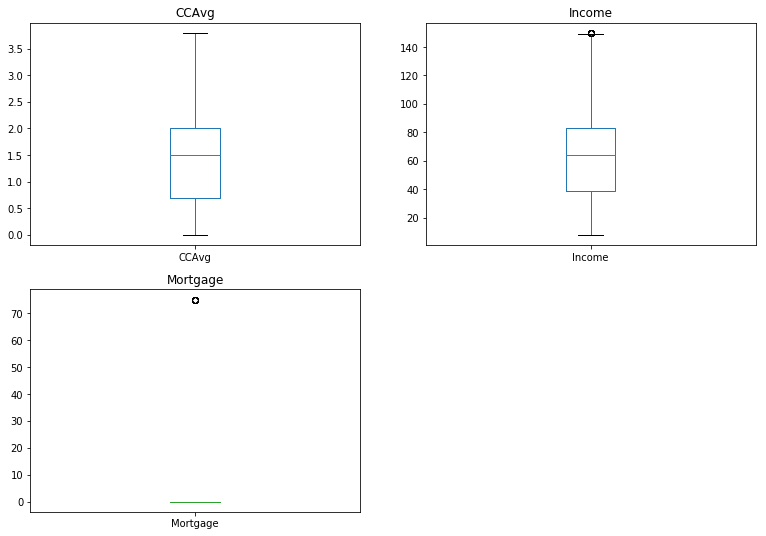

In [26]:
# Without OUTLIERS

plt.figure(figsize=(13,9))

plt.subplot(221)
plt.title('CCAvg')
df.loc[df['CCAvg']>3.8,'CCAvg']=df['CCAvg'].median()
df['CCAvg'].plot.box()

plt.subplot(222)
plt.title('Income')
df.loc[df['Income']>150.5,'Income']=df['Income'].median()
df['Income'].plot.box()

plt.subplot(223)
plt.title('Mortgage')
df.loc[df['Mortgage']>75.5,'Mortgage']=df['Mortgage'].median()
df['Mortgage'].plot.box()

plt.show()

## 7. Transformation:

In [27]:
# separating independent and dependent variables

# dropping Experience column

x=df[['Age','Income','ZIP Code','Family','CCAvg','Education','Mortgage','Securities Account','CD Account','Online','CreditCard']]
y=df['Personal Loan']


In [28]:
# bringing all data in between -3 std to +3 std

from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x=sc.fit_transform(x)

# 8. Modeling :

In [29]:
# now splitting dataset into train and test dataset

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=11)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3750, 11), (1250, 11), (3750,), (1250,))

## 8.1 Applying Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

lg=LogisticRegression()
lg.fit(x_train,y_train)
y1_pred=lg.predict(x_test)

In [31]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

a1=accuracy_score(y_test,y1_pred)
p1=precision_score(y_test,y1_pred)
r1=recall_score(y_test,y1_pred)
f1=f1_score(y_test,y1_pred)
print(a1)
print(p1)
print(r1)
print(f1)

0.9296
0.7450980392156863
0.336283185840708
0.46341463414634143


## 8.2 Applying KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y2_pred=knn.predict(x_test)

In [33]:
a2=accuracy_score(y_test,y2_pred)
p2=precision_score(y_test,y2_pred)
r2=recall_score(y_test,y2_pred)
f2=f1_score(y_test,y2_pred)
print(a2)
print(p2)
print(r2)
print(f2)

0.9272
0.6964285714285714
0.34513274336283184
0.46153846153846145


In [34]:
# this is for n<31 (from 1 to 30 nearest neighbors)

k_value=list(range(1,31))
k_f1=[]

for k in k_value:
    new_knn=KNeighborsClassifier(n_neighbors=k)
    new_knn.fit(x_train,y_train)
    predict=new_knn.predict(x_test)
    k_f1.append(f1_score(y_test,predict))
    
print(k_f1)

[0.5205479452054794, 0.3815789473684211, 0.5251396648044693, 0.4026845637583893, 0.46153846153846145, 0.3815789473684211, 0.475609756097561, 0.4078947368421052, 0.44025157232704404, 0.389261744966443, 0.43870967741935485, 0.3862068965517242, 0.45161290322580644, 0.4161073825503355, 0.43421052631578955, 0.36986301369863017, 0.3783783783783784, 0.380952380952381, 0.380952380952381, 0.36986301369863017, 0.3783783783783784, 0.326241134751773, 0.34722222222222227, 0.3380281690140845, 0.4026845637583893, 0.36986301369863017, 0.4133333333333333, 0.37241379310344835, 0.40540540540540543, 0.3611111111111111]


In [35]:
f22=k_f1[2]
f22

0.5251396648044693

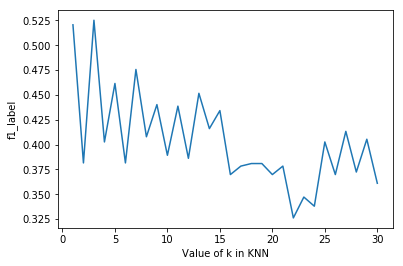

In [36]:
plt.plot(k_value,k_f1)
plt.xlabel("Value of k in KNN")
plt.ylabel("f1_label")
plt.show()

## 8.3 Applying Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

# training the RF Model

rf= RandomForestClassifier(n_estimators=21)
rf.fit(x_train, y_train)
y3_pred=rf.predict(x_test)

In [38]:
a3=accuracy_score(y_test,y3_pred)
p3=precision_score(y_test,y3_pred)
r3=recall_score(y_test,y3_pred)
f3=f1_score(y_test,y3_pred)
print(a3)
print(p3)
print(r3)
print(f3)

0.9752
0.9555555555555556
0.7610619469026548
0.8472906403940886


# Comparing all three models :

In [40]:
accuracy=[a1,a2,a3]
f1_score=[f1,f22,f3]
classifiers=['Logistic Regression','KNN','Random Forest']

df1=pd.DataFrame(accuracy,index=classifiers,columns=['accuracy'])
df1['f1_score']=f1_score
df1

,accuracy,f1_score
Logistic Regression,0.9296,0.463415
KNN,0.9272,0.525140
Random Forest,0.9752,0.847291
